In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# lectura de directorio
!ls

Lectura.pdf                      __pycache__
Presentación - Regresión.pdf     coefplot.py
Primera Regresión.png            earnings.csv
Regresión.ipynb                  lec5_graphs.py


In [3]:
df = pd.read_csv('earnings.csv').drop('Unnamed: 0', axis=1)

In [4]:
df.sample()

earn  height1  height2  sex  race  hisp  ed  yearbn  height  age  \
791  15000.0        5        7    2     1     2  12      13      67   77   

     age_category  eth  male  
791             3    3     0

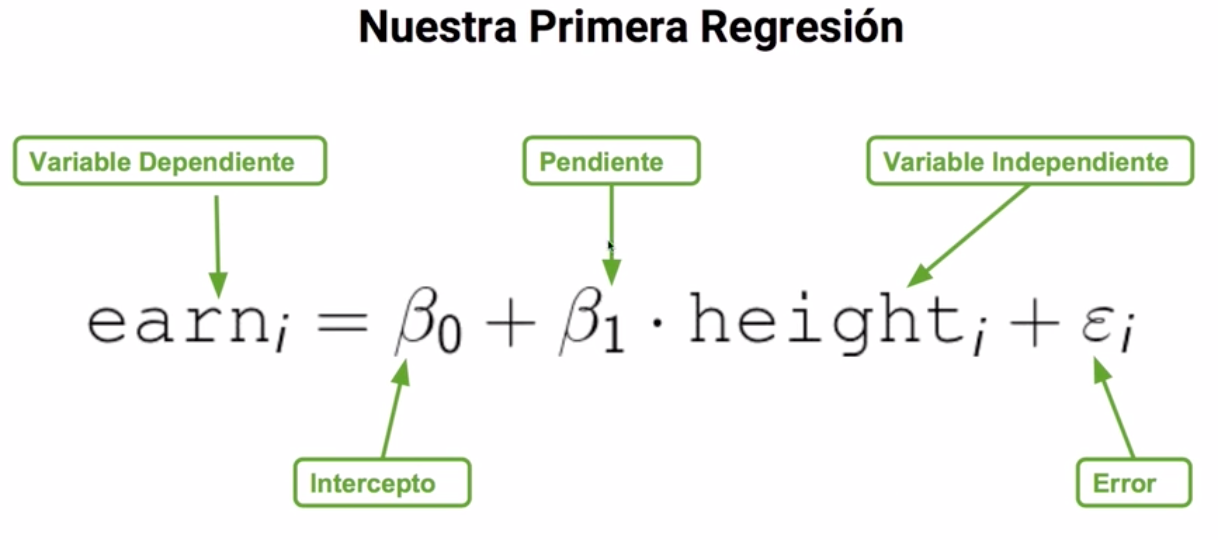

In [5]:
from IPython.display import Image
Image("Primera Regresión.png")

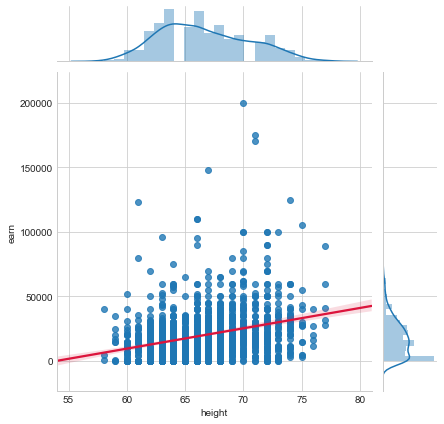

In [6]:
sns.jointplot(df['height'], df['earn'], kind='reg', line_kws={'color':'crimson'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 13 columns):
earn            1374 non-null float64
height1         1374 non-null int64
height2         1374 non-null int64
sex             1374 non-null int64
race            1374 non-null int64
hisp            1374 non-null int64
ed              1374 non-null int64
yearbn          1374 non-null int64
height          1374 non-null int64
age             1374 non-null int64
age_category    1374 non-null int64
eth             1374 non-null int64
male            1374 non-null int64
dtypes: float64(1), int64(12)
memory usage: 139.6 KB


In [8]:
categorical_columns = ['sex','race','hisp','age_category','eth','male']
for cat in categorical_columns:
    print('\n',cat)
    print(df[cat].value_counts())
    print(df[cat].value_counts('%'))


 sex
2    856
1    518
Name: sex, dtype: int64
2    0.622999
1    0.377001
Name: sex, dtype: float64

 race
1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64

 hisp
2    1294
1      80
Name: hisp, dtype: int64
2    0.941776
1    0.058224
Name: hisp, dtype: float64

 age_category
1    564
2    436
3    374
Name: age_category, dtype: int64
1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64

 eth
3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64

 male
0    856
1    518
Name: male, dtype: int64
0    0.622999
1    0.377001
Name: male, dtype: float64


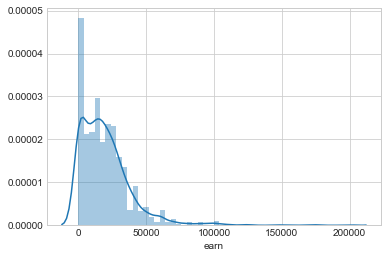

In [9]:
sns.distplot(df['earn'])

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

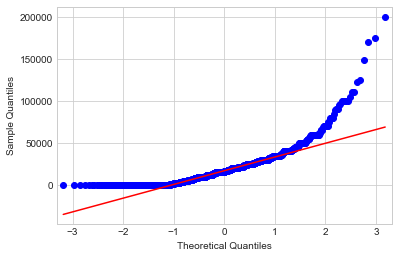

In [11]:
sm.qqplot(df['earn'], line='q');

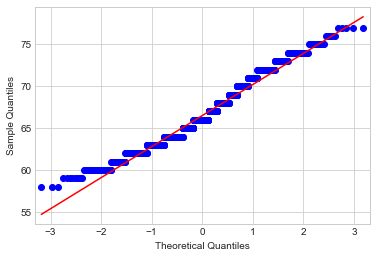

In [12]:
sm.qqplot(df['height'], line='q');

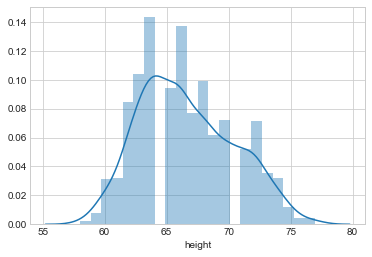

In [13]:
sns.distplot(df['height'])

In [14]:
modelo = smf.ols('earn ~ height', df)

In [15]:
modelo = modelo.fit()

### Prueba F
__Hipótesis Nula:__ No existen coeficientes distintos de cero.

$$
H_{o}: \beta_{0} = \beta_{1} = 0
$$

__Hipótesis Alternativa:__ Por lo menos un coeficiente es distinto de cero.

$$
H_{a}: \beta_{0} \neq \beta_{1} \neq 0
$$

In [16]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.65e-30
Time:                        19:23:50   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

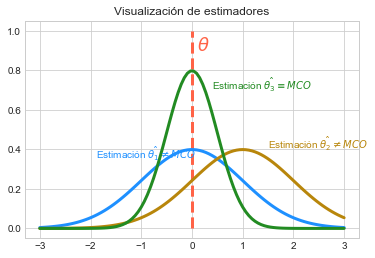

In [17]:
gfx.gauss_markov()

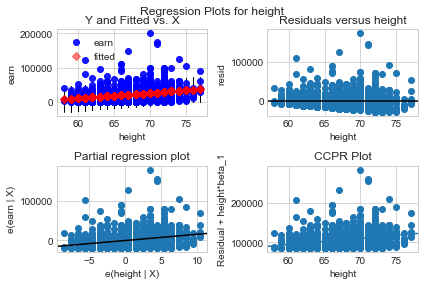

In [18]:
sm.graphics.plot_regress_exog(modelo, 'height');

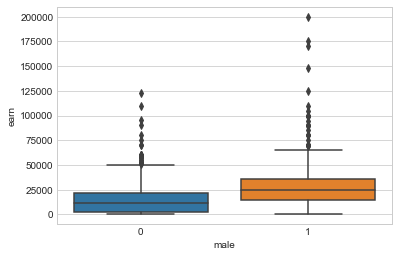

In [19]:
sns.boxplot(x=df['male'], y=df['earn']);

In [20]:
modelo_binario_male = smf.ols('earn ~ male', df).fit()

In [21]:
modelo_binario_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.95e-41
Time:                        19:23:52   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
earn_female = 14560

In [23]:
diff_male = 14380

In [24]:
#promedio hombre
earn_female + diff_male

28940

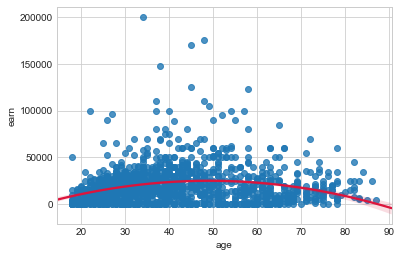

In [25]:
sns.regplot(df['age'], df['earn'], order = 2, line_kws={'color':'crimson'})

In [26]:
df['age_sq'] = df['age'] ** 2

In [27]:
modelo_cuadratico_edad = smf.ols('earn ~ age + age_sq', df).fit()
modelo_cuadratico_edad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           4.80e-18
Time:                        19:23:53   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
modelo_2 = smf.ols('earn ~ age + male', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           3.24e-43
Time:                        19:23:53   Log-Likelihood:                -15443.
No. Observations:                1374   AIC:                         3.089e+04
Df Residuals:                    1371   BIC:                         3.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9517.0050   1488.355      6.394      0.000    6597.305    1.24e+04
age          120.0427     32.090      3.741      0.000      57.093     182.993
male        1.465e+04   1028.734     14.244      0.000    1.26e+04    1.67e+04
==============================================================================
Omnibus:                      866.933   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13792.663
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      17.576   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
modelo_3 = smf.ols('earn ~ ed + male', df).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     206.4
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           4.42e-79
Time:                        19:23:53   Log-Likelihood:                -15361.
No. Observations:                1374   AIC:                         3.073e+04
Df Residuals:                    1371   BIC:                         3.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.064e+04   2613.174     -7.898      0.000   -2.58e+04   -1.55e+04
ed          2660.1759    192.327     13.832      0.000    2282.889    3037.462
male        1.352e+04    968.064     13.968      0.000    1.16e+04    1.54e+04
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12917.525
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      17.154   Cond. No.                         76.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Ecuación Hombres:__

$$
\textsf{earn} = \beta_{0} + \beta_{1} \times \textsf{ed} + \gamma_{2} \times \textsf{male=1} + \varepsilon
$$

__Ecuación Mujeres:__

$$
\textsf{earn} = \beta_{0} + \beta_{1} \times \textsf{ed} + \gamma_{2} \times \textsf{male=0} + \varepsilon \Rightarrow = \beta_{0} + \beta_{1} \times \textsf{ed} + \varepsilon
$$

In [30]:
df_dummy = df.copy()

In [31]:
modelo_3 = smf.ols('earn ~ ed + male', df_dummy).fit()
df_dummy['yhat'] = modelo_3.predict()
df_dummy.head()

earn  height1  height2  sex  race  hisp  ed  yearbn  height  age  \
0  50000.0        6        2    1     1     2  16      45      74   45   
1  60000.0        5        6    2     1     2  16      32      66   58   
2  30000.0        5        4    2     1     2  16      61      64   29   
3  51000.0        5        3    2     1     2  17      51      63   39   
4   9000.0        5        4    2     1     2  15      64      64   26   

   age_category  eth  male  age_sq          yhat  
0             2    3     1    2025  35444.862717  
1             3    3     0    3364  21923.423771  
2             1    3     0     841  21923.423771  
3             2    3     0    1521  24583.599688  
4             1    3     0     676  19263.247854

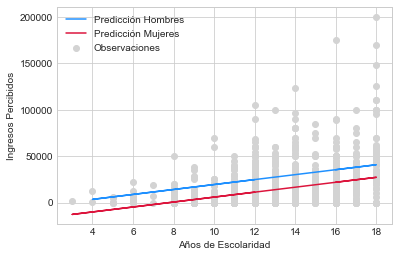

In [32]:
plt.scatter(df_dummy['ed'], df_dummy['earn'], color='lightgrey', label='Observaciones')
plt.plot(df_dummy.query('male == 1')['ed'], df_dummy.query('male == 1')['yhat'], color='dodgerblue', label='Predicción Hombres')
plt.plot(df_dummy.query('male == 0')['ed'], df_dummy.query('male == 0')['yhat'], color='crimson', label='Predicción Mujeres')
plt.xlabel('Años de Escolaridad')
plt.ylabel('Ingresos Percibidos')
plt.legend()

In [33]:
#machine learning
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
attr_mat = df.drop(['earn'], axis=1)

In [36]:
x_mat_train = attr_mat[:-30]
x_mat_test = attr_mat[-30:]
y_train = df['earn'][:-30]
y_test = df['earn'][-30:]

In [37]:
x_mat_train.shape

(1344, 13)

In [38]:
x_mat_test.shape

(30, 13)

In [39]:
y_train.shape

(1344,)

In [40]:
y_test.shape

(30,)

In [41]:
modelo_sklearn = LinearRegression().fit(x_mat_train, y_train)

In [42]:
modelo_sklearn.coef_

array([   14.92703623,   132.30589935, -6360.94719277,  -661.37164603,
        1688.11542562,  2428.20840913,  -886.76446618,   311.43033413,
         886.76446618, -3038.69811608,   185.21329516,  6360.94719277,
         -15.73447966])

In [43]:
modelo_sklearn.intercept_

13833.688816523056

In [44]:
earn_yhat = modelo_sklearn.predict(x_mat_test)

In [45]:
mse_modelo = mean_squared_error(y_test, earn_yhat).round(1)
r2_modelo = r2_score(y_test, earn_yhat).round(1)

print(f"MES: {mse_modelo}\nR2: {r2_modelo}")

MES: 393102326.6
R2: 0.3


In [46]:
columns = df.columns

attr_name, pearson_r, abs_pearson_r = [], [], []

for col in columns:
    if col != 'earn':
        attr_name.append(col)
        pearson_r.append(df[col].corr(df['earn']))
        abs_pearson_r.append(abs(df[col].corr(df['earn'])))
        
features = pd.DataFrame({'attribute':attr_name, 
                         'corr':pearson_r,
                         'abs_corr':abs_pearson_r})

features = features.set_index('attribute')
features.sort_values(by=['abs_corr'], ascending=False)

corr  abs_corr
attribute                       
sex          -0.352354  0.352354
male          0.352354  0.352354
ed            0.349334  0.349334
height        0.302707  0.302707
height1       0.188762  0.188762
height2       0.105633  0.105633
age_category  0.075321  0.075321
yearbn       -0.068475  0.068475
age           0.068475  0.068475
hisp          0.055187  0.055187
eth           0.055139  0.055139
race         -0.031410  0.031410
age_sq        0.026209  0.026209

In [47]:
y_vec = df['earn']
x_mat = df.loc[:, ['sex','male','ed','height']]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.33, random_state=11238)

In [49]:
purge_model = LinearRegression().fit(x_train, y_train)

In [50]:
purge_yhat = purge_model.predict(x_test)
purge_model_mse = mean_squared_error(y_test, purge_yhat).round(1)
purge_model_r2 = r2_score(y_test, purge_yhat)

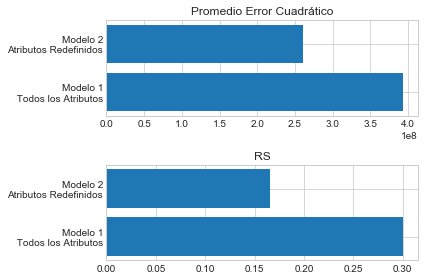

In [51]:
labels = ['Modelo 1\n Todos los Atributos', 'Modelo 2\nAtributos Redefinidos']
plt.subplot(2,1,1)
plt.barh(labels, [mse_modelo, purge_model_mse])
plt.title('Promedio Error Cuadrático')
plt.subplot(2,1,2)
plt.barh(labels, [r2_modelo, purge_model_r2])
plt.title('RS')
plt.tight_layout()